In [1]:
import pandas as pd
df_blitz = pd.read_csv("blitz_leaderboard_dates.csv")
df_bullet = pd.read_csv("bullet_leaderboard_dates.csv")
df_rapid = pd.read_csv("rapid_leaderboard_dates.csv")
df_daily960 = pd.read_csv("960daily_leaderboard_dates.csv")
df_live960 = pd.read_csv("960live_leaderboard_dates.csv")
df_daily = pd.read_csv("daily_leaderboard_dates.csv")

## Blitz / Bullet / Rapid / Daily ベン図

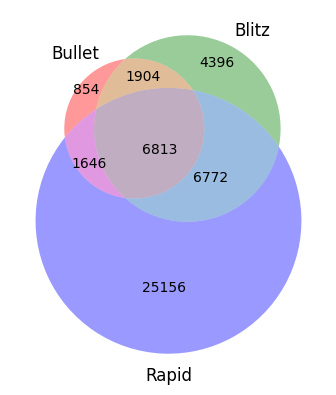

In [2]:
from matplotlib_venn import venn3
import matplotlib.pyplot as plt

bullet_players = df_bullet['Player name']
blitz_players = df_blitz['Player name']
rapid_players = df_rapid['Player name']
live960_players = df_live960['Player name']
daily960_players = df_daily960['Player name']
daily_players = df_daily['Player name']

venn3([set(bullet_players), set(blitz_players), set(rapid_players)], ('Bullet', 'Blitz', 'Rapid'))
plt.show()

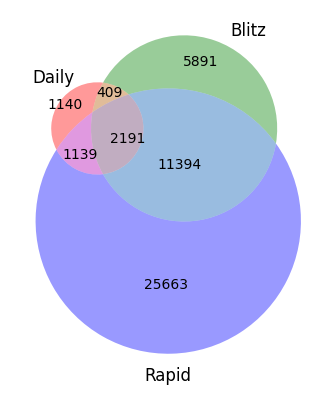

In [3]:
venn3([set(daily_players), set(blitz_players), set(rapid_players)], ('Daily', 'Blitz', 'Rapid'))
plt.show()

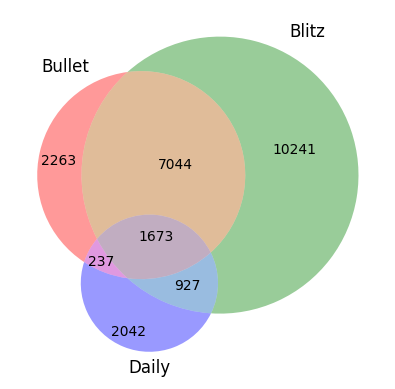

In [4]:
venn3([set(bullet_players), set(blitz_players), set(daily_players)], ('Bullet', 'Blitz', 'Daily'))
plt.show()

## カテゴリー毎のスペシャリスト・プレーヤー数（そのカテゴリーにしか参加しない人たち）

### Bullet

In [5]:
unique_bullet_players = bullet_players[~bullet_players.isin(blitz_players) & ~bullet_players.isin(rapid_players) & ~bullet_players.isin(live960_players) & ~bullet_players.isin(daily960_players) & ~bullet_players.isin(daily_players)]
len(unique_bullet_players)

787

### Blitz

In [6]:
unique_blitz_players = blitz_players[~blitz_players.isin(bullet_players) & ~blitz_players.isin(rapid_players) & ~blitz_players.isin(live960_players) & ~blitz_players.isin(daily960_players) & ~blitz_players.isin(daily_players)]
len(unique_blitz_players)

4202

### Rapid

In [7]:
unique_rapid_players = rapid_players[~rapid_players.isin(bullet_players) & ~rapid_players.isin(blitz_players) & ~rapid_players.isin(live960_players) & ~rapid_players.isin(daily960_players) & ~rapid_players.isin(daily_players)]
len(unique_rapid_players)

24182

### Daily

In [8]:
unique_daily_players = daily_players[~daily_players.isin(bullet_players) & ~daily_players.isin(rapid_players) & ~daily_players.isin(live960_players) & ~daily_players.isin(daily960_players) & ~daily_players.isin(blitz_players)]
len(unique_daily_players)

1055

### Live 960

In [9]:
unique_live960_players = live960_players[~live960_players.isin(bullet_players) & ~live960_players.isin(rapid_players) & ~live960_players.isin(daily_players) & ~live960_players.isin(daily960_players) & ~live960_players.isin(blitz_players)]
len(unique_live960_players)

3

### Daily 960

In [10]:
unique_daily960_players = daily960_players[~daily960_players.isin(bullet_players) & ~daily960_players.isin(rapid_players) & ~daily960_players.isin(daily_players) & ~daily960_players.isin(live960_players) & ~daily960_players.isin(blitz_players)]
len(unique_daily960_players)

2

## Blitz + Bullet + Rapid ユニーク・プレーヤー数

In [11]:
combined_players = pd.concat([blitz_players, bullet_players, rapid_players])
unique_players = combined_players.drop_duplicates()
unique_player_count = len(unique_players)
unique_player_count

47541

## Blitz + Bullet + Rapid + Daily + Live 960 + Daily 960 ユニーク・プレーヤー数

In [12]:
combined_players = pd.concat([blitz_players, bullet_players, rapid_players, live960_players, daily960_players, daily_players])
unique_players = combined_players.drop_duplicates()
unique_player_count = len(unique_players)
unique_player_count

48620

## フィルタリングする前のユニーク・プレーヤー数（unique_player_datesから）

In [13]:
df_all = pd.read_csv("unique_player_dates.csv")
len(df_all)

48620

# フィルタリングしてアクティブ・プレーヤーに絞り込む

In [14]:
# 日付データをdatetimeオブジェクトに変換
df_blitz['Last Online chess.com server time'] = pd.to_datetime(df_blitz['Last Online chess.com server time'])
df_bullet['Last Online chess.com server time'] = pd.to_datetime(df_bullet['Last Online chess.com server time'])
df_rapid['Last Online chess.com server time'] = pd.to_datetime(df_rapid['Last Online chess.com server time'])
df_daily960['Last Online chess.com server time'] = pd.to_datetime(df_daily960['Last Online chess.com server time'])
df_live960['Last Online chess.com server time'] = pd.to_datetime(df_live960['Last Online chess.com server time'])
df_daily['Last Online chess.com server time'] = pd.to_datetime(df_daily['Last Online chess.com server time'])

# この日付以降にログインしていない人は対象外（この日付以降にログインした人だけが調査対象）
filter_date = pd.Timestamp('2023-01-01 00:00:00')

df_filtered_blitz = df_blitz[df_blitz['Last Online chess.com server time'] >= filter_date]
df_filtered_bullet = df_bullet[df_bullet['Last Online chess.com server time'] >= filter_date]
df_filtered_rapid = df_rapid[df_rapid['Last Online chess.com server time'] >= filter_date]
df_filtered_daily960 = df_daily960[df_daily960['Last Online chess.com server time'] >= filter_date]
df_filtered_live960 = df_live960[df_live960['Last Online chess.com server time'] >= filter_date]
df_filtered_daily = df_daily[df_daily['Last Online chess.com server time'] >= filter_date]

## Blitz / Bullet / Rapid ベン図（アクティブ・プレーヤー）

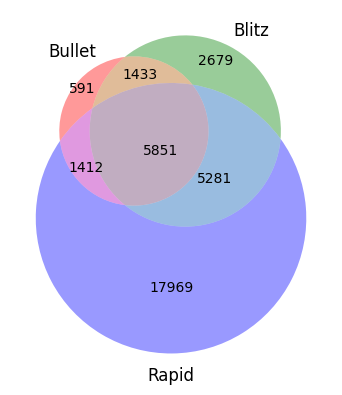

In [15]:
bullet_filtered_players = df_filtered_bullet['Player name']
blitz_filtered_players = df_filtered_blitz['Player name']
rapid_filtered_players = df_filtered_rapid['Player name']
live960_filtered_players = df_filtered_live960['Player name']
daily960_filtered_players = df_filtered_daily960['Player name']
daily_filtered_players = df_filtered_daily['Player name']

venn3([set(bullet_filtered_players), set(blitz_filtered_players), set(rapid_filtered_players)], ('Bullet', 'Blitz', 'Rapid'))
plt.show()

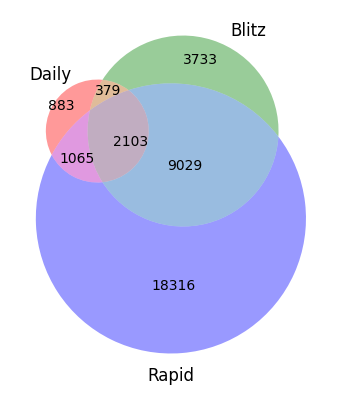

In [16]:
venn3([set(daily_filtered_players), set(blitz_filtered_players), set(rapid_filtered_players)], ('Daily', 'Blitz', 'Rapid'))
plt.show()

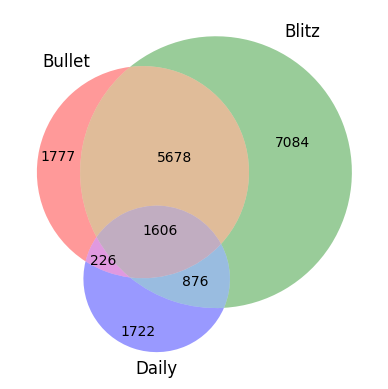

In [17]:
venn3([set(bullet_filtered_players), set(blitz_filtered_players), set(daily_filtered_players)], ('Bullet', 'Blitz', 'Daily'))
plt.show()

## カテゴリー毎のスペシャリスト・プレーヤー数（アクティブ・プレーヤー）

### Bullet

In [18]:
unique_bullet_filtered_players = bullet_filtered_players[~bullet_filtered_players.isin(blitz_filtered_players) & ~bullet_filtered_players.isin(rapid_filtered_players) & ~bullet_filtered_players.isin(live960_filtered_players) & ~bullet_filtered_players.isin(daily960_filtered_players) & ~bullet_filtered_players.isin(daily_filtered_players)]
len(unique_bullet_filtered_players)

532

### Blitz

In [19]:
unique_blitz_filtered_players = blitz_filtered_players[~blitz_filtered_players.isin(bullet_filtered_players) & ~blitz_filtered_players.isin(rapid_filtered_players) & ~blitz_filtered_players.isin(live960_filtered_players) & ~blitz_filtered_players.isin(daily960_filtered_players) & ~blitz_filtered_players.isin(daily_filtered_players)]
len(unique_blitz_filtered_players)

2503

### Rapid

In [20]:
unique_rapid_filtered_players = rapid_filtered_players[~rapid_filtered_players.isin(bullet_filtered_players) & ~rapid_filtered_players.isin(blitz_filtered_players) & ~rapid_filtered_players.isin(live960_filtered_players) & ~rapid_filtered_players.isin(daily960_filtered_players) & ~rapid_filtered_players.isin(daily_filtered_players)]
len(unique_rapid_filtered_players)

17069

### Daily

In [21]:
unique_daily_filtered_players = daily_filtered_players[~daily_filtered_players.isin(blitz_filtered_players) & ~daily_filtered_players.isin(rapid_filtered_players) & ~daily_filtered_players.isin(live960_filtered_players) & ~daily_filtered_players.isin(daily960_filtered_players) & ~daily_filtered_players.isin(bullet_filtered_players)]
len(unique_daily_filtered_players)

806

### Live 960

In [22]:
unique_live960_filtered_players = live960_filtered_players[~live960_filtered_players.isin(bullet_filtered_players) & ~live960_filtered_players.isin(rapid_filtered_players) & ~live960_filtered_players.isin(daily_filtered_players) & ~live960_filtered_players.isin(daily960_filtered_players) & ~live960_filtered_players.isin(blitz_filtered_players)]
len(unique_live960_filtered_players)

1

### Daily 960

In [23]:
unique_daily960_filtered_players = daily960_filtered_players[~daily960_filtered_players.isin(bullet_filtered_players) & ~daily960_filtered_players.isin(rapid_filtered_players) & ~daily960_filtered_players.isin(daily_filtered_players) & ~daily960_filtered_players.isin(live960_filtered_players) & ~daily960_filtered_players.isin(blitz_filtered_players)]
len(unique_daily960_filtered_players)

2

## Blitz + Bullet + Rapid ユニーク・プレーヤー数（アクティブ・プレーヤー）

In [24]:
combined_filtered_players = pd.concat([blitz_filtered_players, bullet_filtered_players, rapid_filtered_players])
unique_filtered_players = combined_filtered_players.drop_duplicates()
unique_filtered_player_count = len(unique_filtered_players)
unique_filtered_player_count

35216

## Blitz + Bullet + Rapid + Daily + Live 960 + Daily 960 ユニーク・プレーヤー数（アクティブ・プレーヤー）

In [25]:
combined_filtered_players = pd.concat([blitz_filtered_players, bullet_filtered_players, rapid_filtered_players, live960_filtered_players, daily960_filtered_players, daily_filtered_players])
unique_filtered_players = combined_filtered_players.drop_duplicates()
unique_filtered_player_count = len(unique_filtered_players)
unique_filtered_player_count

36044

## フィルタリング後のユニーク・プレーヤー数（unique_player_datesから）

In [26]:
df_all = pd.read_csv("unique_player_dates.csv")
df_all['Last Online chess.com server time'] = pd.to_datetime(df_all['Last Online chess.com server time'])
filter_date = pd.Timestamp('2023-01-01 00:00:00')
df_filtered_all = df_all[df_all['Last Online chess.com server time'] >= filter_date]
len(df_filtered_all)

36044

# unique_filtered_players数（36067）とdf_filtered_all数（36044）が合わないので調査

In [27]:
# unique_filtered_players.to_csv("unique_filtered_players.csv", index=False)
# df_filtered_all.to_csv("df_filtered_all.csv", index=False)
# unique_filtered_players = pd.read_csv("unique_filtered_players.csv")
# df_filtered_all = pd.read_csv("df_filtered_all.csv")

# missing_players = unique_filtered_players[~unique_filtered_players['Player name'].isin(df_filtered_all['Player name'])]
# # missing 'Player name' に対して 'Last Online chess.com server time' を 'unique_player_dates.csv'（unique_filtered_players.csvの元データ）から結合
# unique_player_dates = pd.read_csv("unique_player_dates.csv")
# missing_player_dates = missing_players.merge(unique_player_dates, on='Player name', how='left')
# missing_player_dates

### daily_leaderboard_dates.csv の Last Online 日時が間違っている模様。unique_player_dates.csv から付け直す

In [28]:
# # 'Last Online chess.com server time' columnをdf_dailyから削除
# df_daily = pd.read_csv("daily_leaderboard_dates.csv")
# df_daily_rev = df_daily.drop('Last Online chess.com server time', axis=1)
# df_daily_rev = df_daily_rev.iloc[:, 1:]
# df_daily_rev

In [29]:
# # unique_player_datesから必要なcolumnを抽出
# unique_player_dates = pd.read_csv("unique_player_dates.csv")
# unique_dates = unique_player_dates[['Player name', 'Last Online chess.com server time']]
# unique_dates

In [30]:
# # df_dailyとunique_datesを'Merge'して'Last Online chess.com server time' columnを更新
# df_daily_rev = pd.merge(df_daily_rev, unique_dates, on='Player name', how='left')
# Ruka_row = df_daily_rev.loc[df_daily_rev['Player name'] == 'RuKaChAn2']
# Ruka_row

In [31]:
# df_daily_rev.to_csv("daily_leaderboard_dates.csv", index=False)

### *_leaderboard_dates.csvファイルを結合、重複を削除し merged_dates を作成。unique_player_dates.csvとPlayer nameで照合し、Last Online chess.com server timeが食い違う者をリストアップ

In [32]:
# df_blitz = pd.read_csv("blitz_leaderboard_dates.csv")
# df_bullet = pd.read_csv("bullet_leaderboard_dates.csv")
# df_rapid = pd.read_csv("rapid_leaderboard_dates.csv")
# df_daily960 = pd.read_csv("960daily_leaderboard_dates.csv")
# df_live960 = pd.read_csv("960live_leaderboard_dates.csv")
# df_daily = pd.read_csv("daily_leaderboard_dates.csv")

# merged_dates = pd.concat([df_blitz, df_bullet, df_rapid, df_daily960, df_live960, df_daily])
# merged_dates.drop_duplicates(subset=['Player name'], keep='first', inplace=True)
# merged_dates.to_csv("merged_dates.csv")

# unique_player_dates = pd.read_csv("unique_player_dates.csv")

# # Merge the two dataframes based on 'Player name' column
# comparison_df = pd.merge(unique_player_dates, merged_dates, on='Player name', suffixes=('_unique', '_merged'))

# # Find where 'Last Online chess.com server time' is different
# diff_df = comparison_df[comparison_df['Last Online chess.com server time_unique'] != comparison_df['Last Online chess.com server time_merged']]

# # Select only the relevant columns and rename them
# date_comparison = diff_df[['Player name', 'Last Online chess.com server time_unique', 'Last Online chess.com server time_merged']]
# date_comparison.columns = ['Player name', 'Last Online chess.com server time in unique_player_dates', 'Last Online chess.com server time in merged_dates']

# date_comparison

## 月毎の新規登録者数

In [33]:
# df_all['Join date'] = pd.to_datetime(df_all['Joined'])
# df_all['Join month'] = df_all['Join date'].dt.strftime('%Y-%m')
# monthly_counts = df_all['Join month'].value_counts().sort_index()

# # Create a bar chart of monthly counts
# monthly_counts.plot(kind='bar', figsize=(12,6))
# plt.title('Monthly New Member Counts')
# plt.xlabel('Month')
# plt.ylabel('New Member Count')
# plt.show()

# 四半期毎の新規登録者数

In [34]:
# df_all['Join date'] = pd.to_datetime(df_all['Joined'])
# df_all['Join quarter'] = df_all['Join date'].dt.to_period('Q')

# quarterly_counts = df_all['Join quarter'].value_counts().sort_index()

# quarterly_counts.plot(kind='bar', figsize=(10, 6))
# plt.title('New Member Counts by each quarter')
# plt.xlabel('Quarter')
# plt.ylabel('New Member Count')
# plt.show()

## 2023年1月1日以降にログインしたことのある人に絞って、四半期ごとの登録者数をグラフ化

In [35]:
# df_filtered_all_copy = df_filtered_all.copy()
# df_filtered_all_copy['Join date'] = pd.to_datetime(df_filtered_all_copy['Joined'])
# df_filtered_all_copy['Join quarter'] = df_filtered_all_copy['Join date'].dt.to_period('Q')

# quarterly_counts = df_filtered_all_copy['Join quarter'].value_counts().sort_index()

# quarterly_counts.plot(kind='bar', figsize=(10, 6))
# plt.title('New Member Counts by each quarter')
# plt.xlabel('Quarter')
# plt.ylabel('New Member Count')
# plt.show()

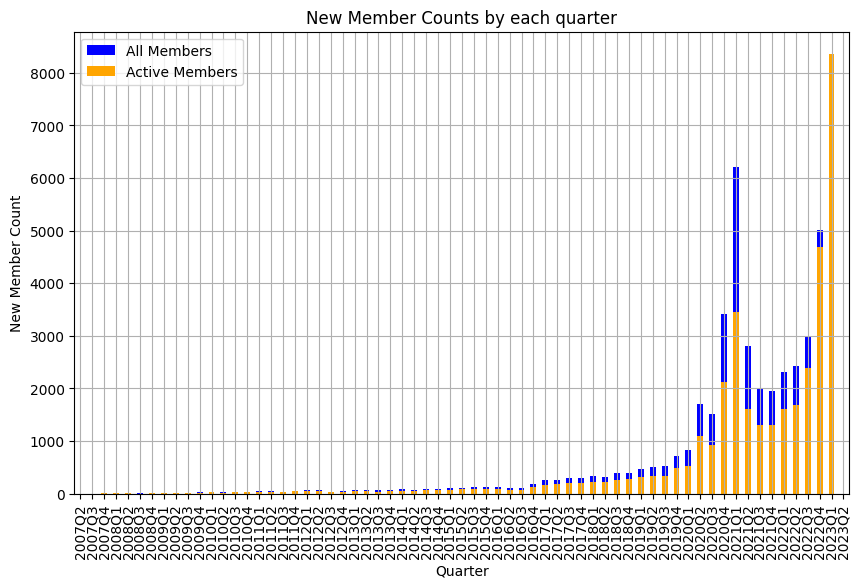

In [58]:
# 四半期ごとの新規登録者数
df_all['Join date'] = pd.to_datetime(df_all['Joined'])
df_all['Join quarter'] = df_all['Join date'].dt.to_period('Q')
quarterly_counts_all = df_all['Join quarter'].value_counts().sort_index()

# 新規登録者数の内アクティブなメンバー
df_filtered_all_copy = df_filtered_all.copy()
df_filtered_all_copy['Join date'] = pd.to_datetime(df_filtered_all_copy['Joined'])
df_filtered_all_copy['Join quarter'] = df_filtered_all_copy['Join date'].dt.to_period('Q')
quarterly_counts_filtered = df_filtered_all_copy['Join quarter'].value_counts().sort_index()

# Create a figure and axis object
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the bar graphs on the same axis
quarterly_counts_all.plot(kind='bar', alpha=1.0, color='blue', label='All Members', ax=ax)
quarterly_counts_filtered.plot(kind='bar', alpha=1.0, color='orange', label='Active Members', ax=ax)

# Customize the plot
plt.title('New Member Counts by each quarter')
plt.xlabel('Quarter')
plt.ylabel('New Member Count')
plt.legend()
ax.grid(True)
plt.savefig('newMember.png')
plt.show()

### Preparation of csv file to draw a venn diagram with 4 sets of data by BioVinci

In [37]:
biovinci_all = pd.concat([blitz_players, bullet_players, rapid_players, live960_players, daily960_players, daily_players], keys=['blitz', 'bullet', 'rapid', 'live960', 'daily960', 'daily'], axis=1)
biovinci_all.to_csv("biovinci_all.csv")

## Blitz / Bullet / Rapid / Daily ベン図
The plot was created with BioVinci software (BioTuring Inc., San Diego, CA, USA).

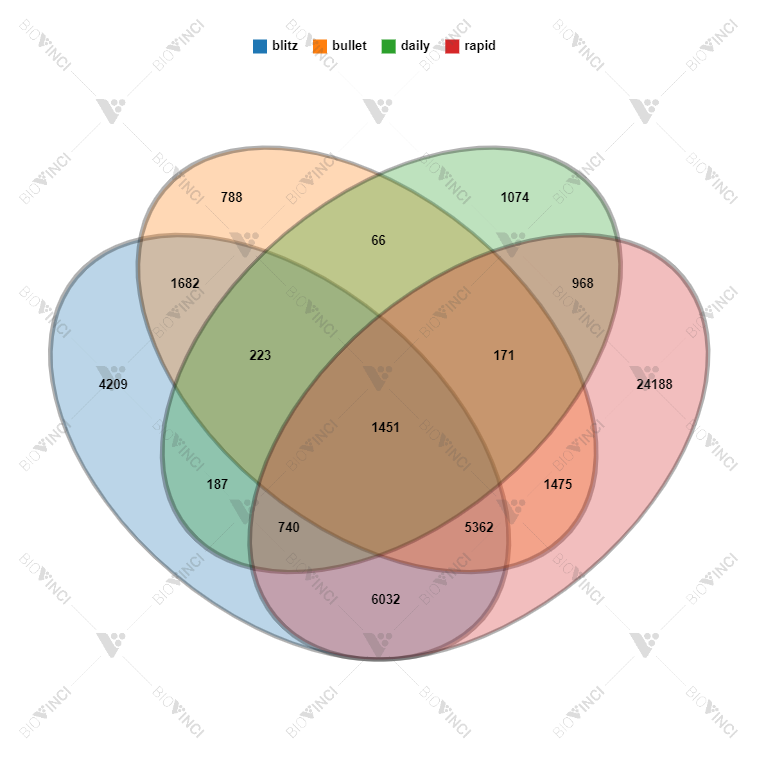

In [38]:
from IPython.display import Image
Image(filename='venn4.png')

## Blitz / Bullet / Rapid / Daily / 960 Live / 960 Daily ベン図
The plot was created with BioVinci software (BioTuring Inc., San Diego, CA, USA).

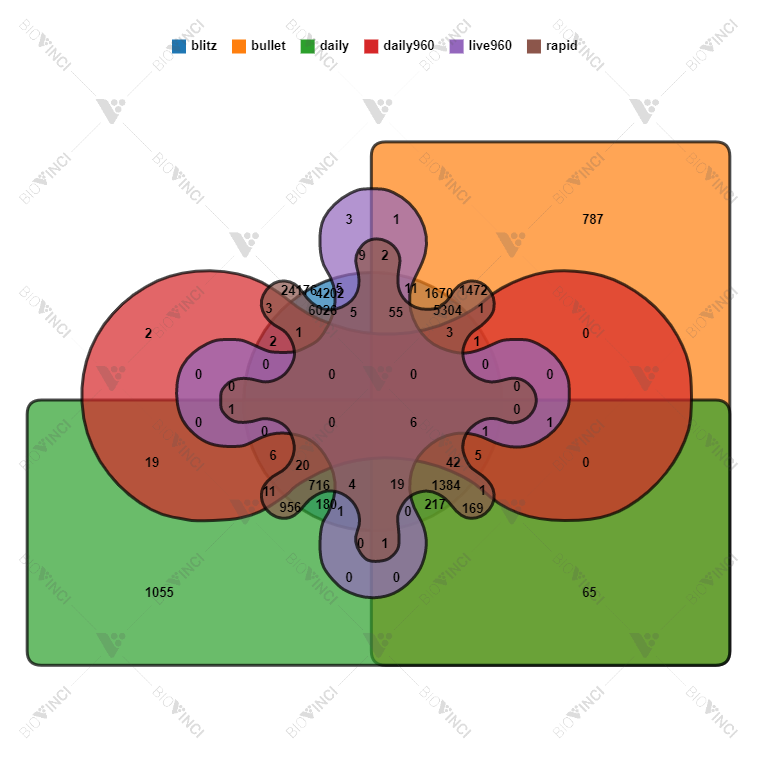

In [39]:
Image(filename='venn6.png')

## Blitz / Bullet / Rapid / Daily ベン図（アクティブ・プレーヤー）
The plot was created with BioVinci software (BioTuring Inc., San Diego, CA, USA).

In [40]:
biovinci_filtered = pd.concat([blitz_filtered_players, bullet_filtered_players, rapid_filtered_players, live960_filtered_players, daily960_filtered_players, daily_filtered_players], keys=['blitz', 'bullet', 'rapid', 'live960', 'daily960', 'daily'], axis=1)
biovinci_filtered.to_csv("biovinci_filtered.csv")

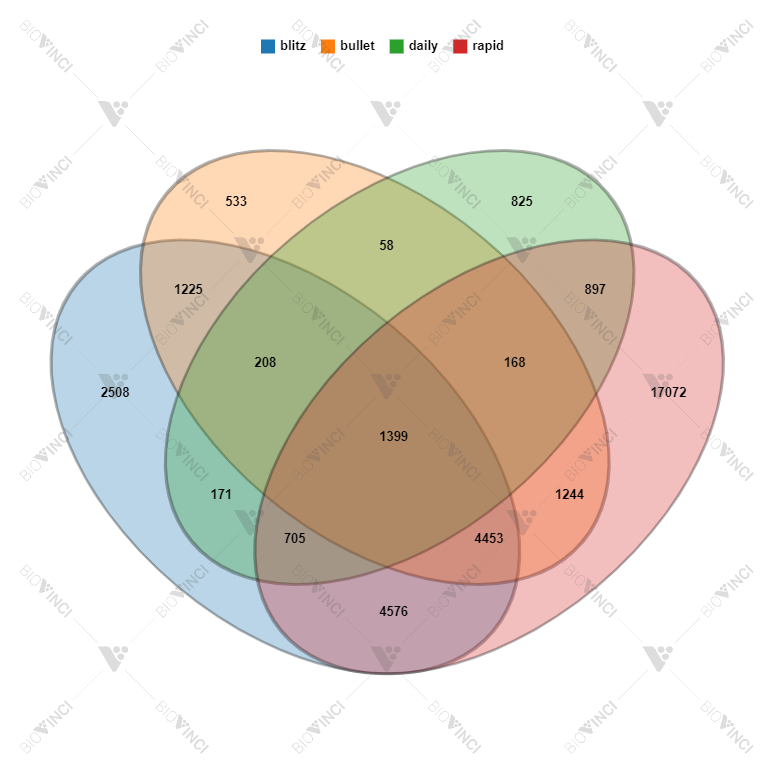

In [41]:
Image(filename='venn4_filtered.png')

## レーティング分布（Rapid）

<Axes: xlabel='Rating', ylabel='Count'>

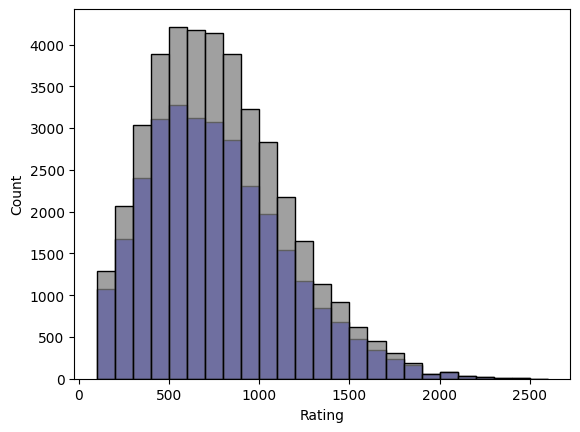

In [45]:
import seaborn as sns
sns.histplot(data=df_filtered_rapid, x='Rating', kde=False, color='blue', binwidth=100)
sns.histplot(df_rapid['Rating'], kde=False, color='grey', binwidth=100)

In [47]:
df_rapid['Rating'].describe()

count    40393.000000
mean       776.879014
std        374.433143
min        100.000000
25%        495.000000
50%        735.000000
75%       1009.000000
max       2516.000000
Name: Rating, dtype: float64

In [46]:
df_filtered_rapid['Rating'].describe()

count    30518.000000
mean       767.202307
std        381.602415
min        100.000000
25%        480.000000
50%        720.000000
75%       1000.000000
max       2516.000000
Name: Rating, dtype: float64

## レーティング分布（Blitz）

<Axes: xlabel='Rating', ylabel='Count'>

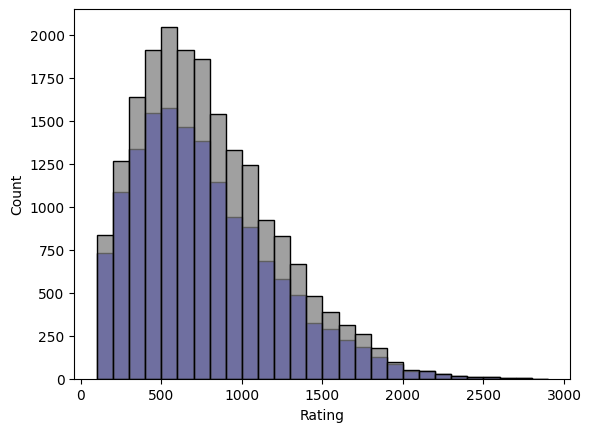

In [48]:
sns.histplot(data=df_filtered_blitz, x='Rating', kde=False, color='blue', binwidth=100)
sns.histplot(df_blitz['Rating'], kde=False, color='grey', binwidth=100)

In [49]:
df_blitz['Rating'].describe()

count    19889.000000
mean       786.107094
std        425.768603
min        100.000000
25%        466.000000
50%        717.000000
75%       1039.000000
max       2866.000000
Name: Rating, dtype: float64

In [51]:
df_filtered_blitz['Rating'].describe()

count    15248.000000
mean       768.820239
std        433.439774
min        100.000000
25%        443.000000
50%        692.000000
75%       1018.250000
max       2866.000000
Name: Rating, dtype: float64

## レーティング分布（Bullet）

<Axes: xlabel='Rating', ylabel='Count'>

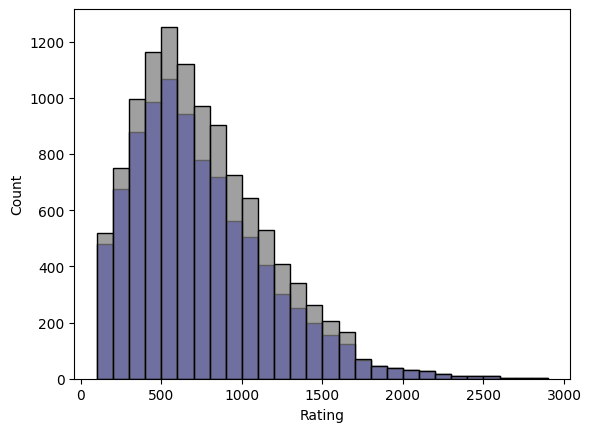

In [52]:
sns.histplot(data=df_filtered_bullet, x='Rating', kde=False, color='blue', binwidth=100)
sns.histplot(df_bullet['Rating'], kde=False, color='grey', binwidth=100)

In [53]:
df_bullet['Rating'].describe()

count    11219.000000
mean       753.724664
std        412.516424
min        100.000000
25%        445.000000
50%        681.000000
75%       1000.500000
max       2824.000000
Name: Rating, dtype: float64

In [54]:
df_filtered_bullet['Rating'].describe()

count    9289.000000
mean      737.805684
std       419.471839
min       100.000000
25%       427.000000
50%       654.000000
75%       973.000000
max      2824.000000
Name: Rating, dtype: float64

## レーティング分布（Daily）

<Axes: xlabel='Rating', ylabel='Count'>

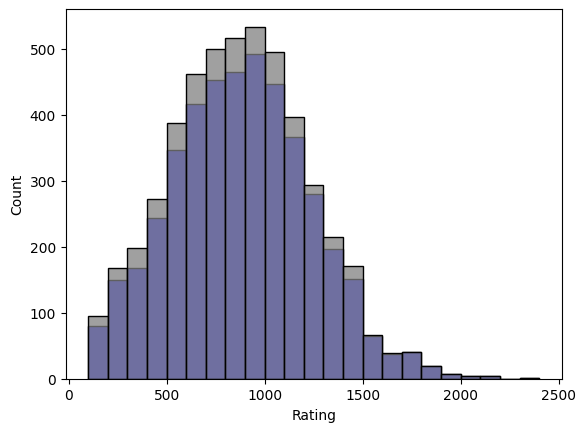

In [57]:
sns.histplot(data=df_filtered_daily, x='Rating', kde=False, color='blue', binwidth=100)
sns.histplot(df_daily['Rating'], kde=False, color='grey', binwidth=100)

In [55]:
df_daily['Rating'].describe()

count    4879.000000
mean      873.542939
std       352.521991
min       100.000000
25%       626.000000
50%       871.000000
75%      1108.500000
max      2316.000000
Name: Rating, dtype: float64

In [56]:
df_filtered_daily['Rating'].describe()

count    4430.000000
mean      881.428668
std       353.456886
min       100.000000
25%       632.000000
50%       879.000000
75%      1116.000000
max      2316.000000
Name: Rating, dtype: float64